<a href="https://colab.research.google.com/github/danielburch/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [8]:
a = [3505,2400,3207,2798,3700,3250,2689]

# Calculate the Mean (mean = (sum of variables / number of variables )
def mean_list(lists):
  list_len = len(lists)
  list_sum = sum(lists)
  return(list_sum/list_len)

mean_a = mean_list(a)
print(mean_a)

3078.4285714285716


In [30]:
# Calculate the variance (variance = sum((variable1 - mean)**2),....) / len(a) - 1

def var_list(lists,mean_lists):
  sum_dif_list_mean = 0
  for i in lists:
    sum_dif_list_mean = sum_dif_list_mean + (i - mean_lists)**2
   
  
  return(sum_dif_list_mean / (len(lists)-1))


var_a = var_list(a,mean_a)

print(var_a)





217473.61904761902


In [32]:
#Calculate the STD (STD = SQUARE ROOT OF VARIANCE)

def std_var(list_var):
  return list_var**.5

std_a = std_var(var_a)

print(std_a)

466.340668447026


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [52]:
#Covariance Table

#Customers
b = [127,80,105,92,120,115,93]

#Combine two datasets
a_b = {'a':a, 'b':b}

#Convert combined table to dataframe
df = pd.DataFrame(a_b)


corr_a_b = df.cov()['a']['b']
print(corr_a_b)


7617.214285714284


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [38]:

#Mean of b
mean_b = mean_list(b)

#Variance of b
var_b = var_list(b,mean_b)

#STD

std_b = std_var(var_b)

print(std_b)


17.057326313123664


In [57]:
# Correlation Coefficient

r = corr_a_b / (std_a*std_b)

print(r)

0.9575951208922782


In [58]:
df.corr()['a']['b']

0.9575951208922785

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [74]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv',index_col=0)

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [67]:
titanic.dtypes

pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [77]:
df = titanic[['pclass','survived','age','sibsp','parch','fare','body','has_cabin_number']]

df.head()



,pclass,survived,age,sibsp,parch,fare,body
1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN
2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN
3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN
4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0
5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN


In [78]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567


In [79]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

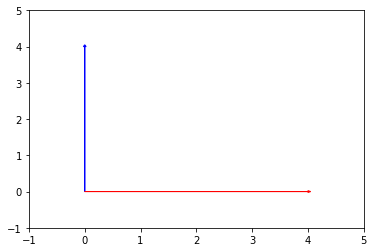

In [80]:
v1 = [0,4]
v2 = [4,0]

plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,5)          
plt.ylim(-1,5)

plt.show()

In [ ]:
'''
Synonym: perpendicular

'''

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [86]:
# Orthogonal if there dot product equals zero

a = np.array([-5,3,7])
b = np.array([6,-8,2])

print(a + b)

[ 1 -5  9]


In [ ]:
'''
Dot product does not equal zero

'''

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [88]:
c =[2,-15,6,20]
c_np = np.array(c)

#Norm squared
c_norm = (np.linalg.norm(c_np))**2
print('c norm squared:',c_norm)

#Vector Dot
c_c = np.vdot(c_np,c_np)
print('Vector Dot:',c_c)

#Transpose multiplied by array
c_t_c = c_np.T * c_np
print('c transpose by c:',c_t_c)

c norm squared: 665.0
Vector Dot: 665
c transpose by c: [  4 225  36 400]


In [ ]:
'''
Equal to 665 or sum to 665

'''

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


**Linear Combination of scalars**

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

**Unit Vectors**

\begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89
\end{align}


\begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{13.89}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix} \frac{7}{13.89} \\ \frac{12}{13.89} \\  \end{bmatrix}
\end{align}

**Linear Combination of scalars**

\begin{align}
e = \begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0\\0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\\0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}
\end{align}

**Unit Vectors**

\begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 + 64} = \sqrt{189} = 13.74
\end{align}


\begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{13.74}\begin{bmatrix} 2 \\ 11\\-8 \end{bmatrix} = \begin{bmatrix} \frac{2}{13.74} \\ \frac{11}{13.74} \\\frac{-8}{13.74} \\   \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [91]:
f = np.array([4,12,11,9,2])

f_norm = np.linalg.norm(f)

f_u_vec = f_norm/f_norm

print(f_u_vec)

1.0


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

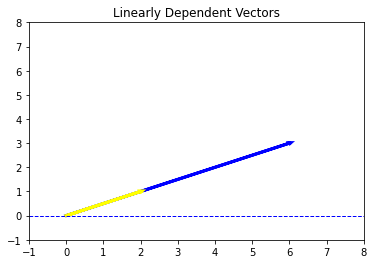

In [92]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1,8)          
plt.ylim(-1,8)

# Original Vector
v = [2,1] 

# Scaled Vectors
v2 = np.multiply(3, v)


# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')


plt.title("Linearly Dependent Vectors")
plt.show()

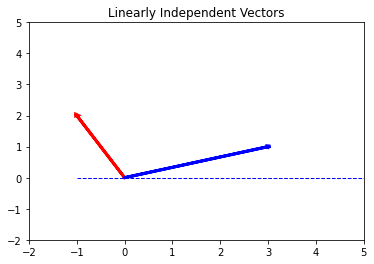

In [96]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2, 5)          
plt.ylim(-2, 5)

# Vector
a = [-1, 2] 
b = [3, 1]

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='Red')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='Blue')


plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

---



\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

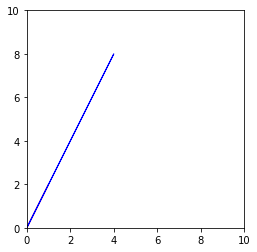

In [100]:
g = [1,2]
h = [4,8]

plt.arrow(0, 0, g[0], g[1], color='r')
plt.arrow(0, 0, h[0], h[1], color='b')

plt.xlim(0,10)
plt.ylim(0,10)
ax = plt.gca()
ax.set_aspect('equal')

plt.savefig('ind_vectors.png', transparent=False, dpi=150)
plt.show()

In [ ]:
'''
These vectors point in the same direction and are linearly dependent. 
They are not able to span any point in 2D space
'''

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

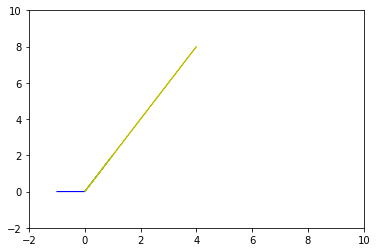

In [103]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

plt.arrow(0, 0, l[0], l[1], color='g')
plt.arrow(0, 0, m[0], m[1], color='b')
plt.arrow(0, 0, n[0], n[1], color='y')

plt.xlim(-2,10)
plt.ylim(-2,10)


plt.savefig('ind_vectors.png', transparent=False, dpi=150)
plt.show()

In [ ]:
'''
Span of 2

The vectors m and n "span" two dimensional space. 
Or they could be scaled and combined to create any point in two dimensional space.

l is just a scaled version of n. It's a redundant vector
'''

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


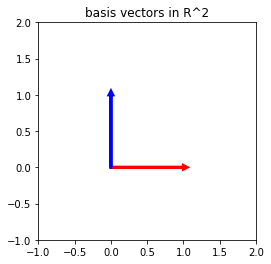

In [98]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show();

## 6.2 What does it mean to form a basis?


To calculate the simplest unit vectors that can exist. One lies on the x-axis and the other on the y-axis. 



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [106]:
import numpy as np

P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.  Meaning that it calculates the number linearly independent vectors in the matrix and that the span of those vectors is two-dimensional space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

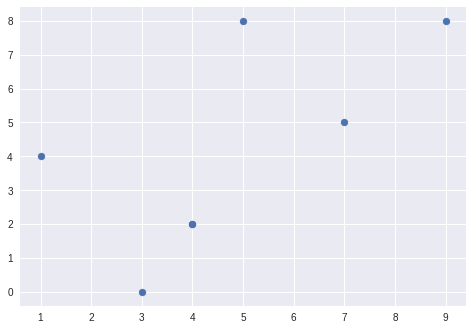

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()